In [1]:
#Importing modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import CubicSpline
import scipy.integrate as integrate

#Defining all constants
G = 6.6743e-11 #m^3/kg/s^-2
g_approx = 9.81 #m/s^2
M_earth = 5.972e24 #kg
M_moon = 7.35e22 #kg
R_earth = 6.3781e6 #m
R_moon = 1.7381e6
Earth_rot_rate_eq = 7.272e-5 #s^-1

In [2]:
shaft_depth = 4e3 #m
t_simple = np.sqrt((2*shaft_depth)/g_approx)
print(f"The simple calculation assuming no drag says that the mass will reach the bottom of a 4km mineshaft at {t_simple} seconds")

The simple calculation assuming no drag says that the mass will reach the bottom of a 4km mineshaft at 28.55686245854129 seconds


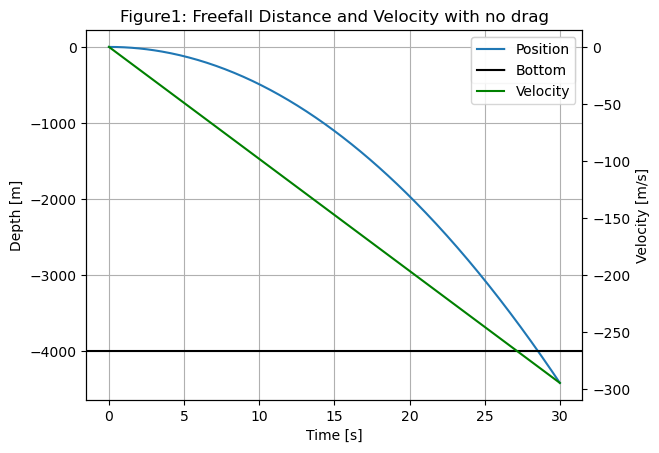

In [3]:
def free_fall(t,s):
    y = s[0]
    v = s[1]
    
    d = np.zeros(len(s))
    
    d[0] = v
    d[1] =  -g + alpha*((v)**gamma)
    
    return d

alpha = 0
gamma = 1
g = g_approx
t0 = 0
t1 = 30 #s
tt = np.linspace(t0,t1,300)

no_drag_case = solve_ivp(fun = free_fall, t_span = (t0,t1), y0 = [0,0], t_eval = tt)

s = no_drag_case.y[0]
v = no_drag_case.y[1]

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(tt, s, label = "Position")
ax2.plot(tt, v, label = "Velocity", color = "green")
ax.axhline(-4000, color = "black", label = "Bottom")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Depth [m]")
ax2.set_ylabel("Velocity [m/s]")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
ax.set_title("Figure1: Freefall Distance and Velocity with no drag")
ax.grid()
ax.legend()

In [4]:
def bottom(t,s):
    return s[0]+4000
no_drag_case_crash = solve_ivp(fun = free_fall, t_span = (t0,t1), y0 = [0,0], t_eval = tt, events = bottom)
crash = no_drag_case_crash.t_events[0]
print(f"The mass hits the bottom of the 4km shaft at {crash[0]} seconds assuming no drag using solve_ivp")

The mass hits the bottom of the 4km shaft at 28.5568624585413 seconds assuming no drag using solve_ivp


The two methods give nearly the exact same result. The only difference is that the simple result is accurate to one more significant figure than the solve_ivp solution giving a 29 at the end as compared to a 3. This is likely only due to small rounding errors in the solve_ivp method since it does more calculations than the simple calculation that only does 1.

The mass hits the bottom of the 4km shaft at 28.558355111852933 seconds assuming no drag using solve_ivp, with a variable gravity


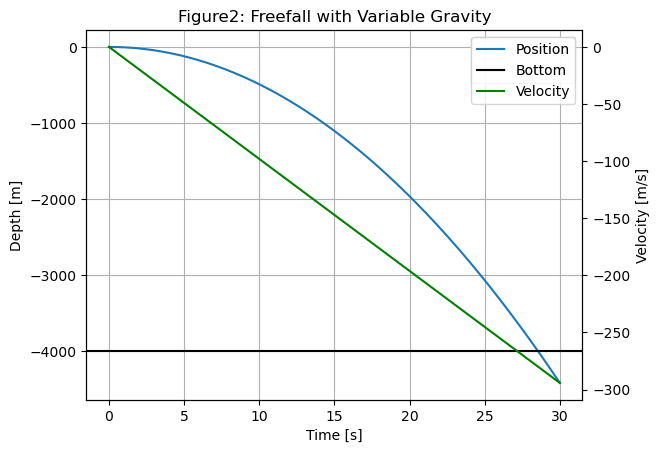

In [5]:
def var_grav(r):
    return g_approx*((r)/R_earth)

def free_fall_var_g(t,s):
    y = s[0]
    v = s[1]
    
    d = np.zeros(len(s))
    
    d[0] = v
    d[1] = -var_grav(y+R_earth) + alpha*((v)**gamma) #y+R_earth since var_grav uses radius from centre not depth
    
    return d
    
bottom.terminal  = False

Var_g_case = solve_ivp(fun = free_fall_var_g, t_span = (t0,t1), y0 = [0,0], t_eval = tt, events = bottom)

s = Var_g_case.y[0]
v = Var_g_case.y[1]

crash1 = Var_g_case.t_events[0]
print(f"The mass hits the bottom of the 4km shaft at {crash1[0]} seconds assuming no drag using solve_ivp, with a variable gravity")

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(tt, s, label = "Position")
ax2.plot(tt, v, label = "Velocity", color = "green")
ax.axhline(-4000, color = "black", label = "Bottom")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Depth [m]")
ax2.set_ylabel("Velocity [m/s]")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
ax.set_title("Figure2: Freefall with Variable Gravity")
ax.legend()
ax.grid()

The Free-fall time increases by about 0.002 seconds because as the mass falls the gravitation acceleration decreases slightly making the mass fall slower than it would if gravity was consant

The mass hits the bottom of the 4km shaft at 84.27796653906074 seconds assuming no drag using solve_ivp


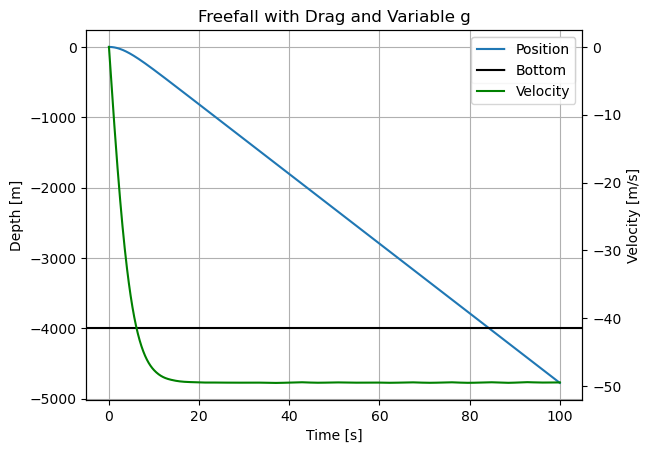

In [6]:
gamma = 2
alpha = 0.004
bottom.terminal = False
def free_fall_drag(t,s):
    y = s[0]
    v = s[1]
    
    d = np.zeros(len(s))
    
    d[0] = v
    d[1] = -var_grav(y+R_earth) + alpha*((v)**gamma)
    
    return d

t1_drag = 100
tt2 = np.linspace(t0,t1_drag, 1000)

with_drag_case = solve_ivp(fun = free_fall_drag, t_span = (t0,t1_drag), y0 = [0,0], t_eval = tt2, events = bottom)


s = with_drag_case.y[0]
v = with_drag_case.y[1]

crash2 = with_drag_case.t_events[0]
print(f"The mass hits the bottom of the 4km shaft at {crash2[0]} seconds assuming no drag using solve_ivp")

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(tt2, s, label = "Position")
ax2.plot(tt2, v, label = "Velocity", color = "green")
ax.axhline(-4000, color = "black", label = "Bottom")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Depth [m]")
ax2.set_ylabel("Velocity [m/s]")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
ax.set_title("Freefall with Drag and Variable g")
ax.grid()
ax.legend()
plt.savefig("Freefall_with_Drag.png")

The drag adds a significant amount of time for the mass to hit the bottom of the shaft 

The mass hits the bottom of the 4km shaft at 28.558375882561684 seconds and the side of the shaft at 27.601682786854237 seconds at a depth of -3647.9944596672885 assuming no drag using solve_ivp
The mass hits the side before it hits the bottom


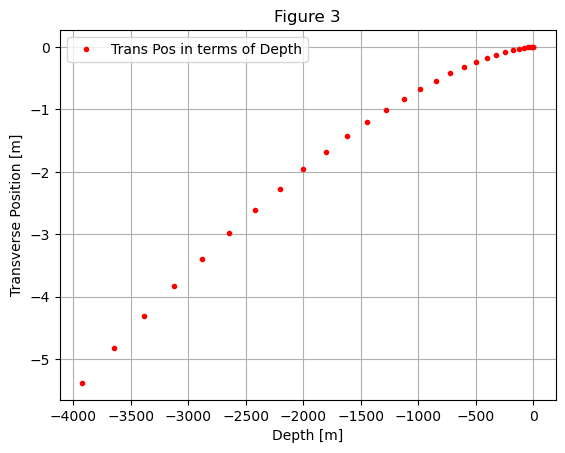

In [7]:
omega = Earth_rot_rate_eq
gamma = 0
alpha = 0
def free_fall_drag_coriolis(t,s):
    y = s[0]
    x = s[1]
    vy = s[2]
    vx = s[3]
    
    d = np.zeros(len(s))
    
    d[0] = vy
    d[1] = vx + alpha*((vx)**gamma)
    d[2] = -var_grav(y+R_earth) + alpha*((vy)**gamma) - 2*omega*vx
    d[3] = 2*omega*vy
    
    return d
bottom.terminal = True
def side(t,s):
    return s[1]+5

t1_drag = 100
tt2 = np.linspace(t0,t1_drag, 100)

coriolis_no_drag_case = solve_ivp(fun = free_fall_drag_coriolis, t_span = (t0,t1_drag), y0 = [0,0,0,0], t_eval = tt2, events = [bottom, side])

y = coriolis_no_drag_case.y[0] 
x = coriolis_no_drag_case.y[1]
vy = coriolis_no_drag_case.y[2]
vx = coriolis_no_drag_case.y[3]

crash3 = coriolis_no_drag_case.t_events[0]
side_hit = coriolis_no_drag_case.t_events[1]
side_hit_time = int(side_hit[0])
side_hit_depth = coriolis_no_drag_case.y_events[1]

print(f"The mass hits the bottom of the 4km shaft at {crash3[0]} seconds and the side of the shaft at {side_hit[0]} seconds at a depth of {y[side_hit_time]} assuming no drag using solve_ivp")
hit = side_hit[0]<crash3[0]

if hit == True: 
    print("The mass hits the side before it hits the bottom")
else:
    print("The mass does not hit the side")


fig, ax = plt.subplots()
ax.plot(y,x, "ro", label = "Trans Pos in terms of Depth", markersize = 3)
ax.set_xlabel("Depth [m]")
ax.set_ylabel("Transverse Position [m]")
ax.set_title("Figure 3")
ax.legend()
ax.grid()

The mass hits the bottom of the 4km shaft at 84.27701758114327 seconds and the side of the shaft at 40.65519839614928 seconds at a depth of -1827.5292760159696 assuming no drag using solve_ivp
The mass hits the side before it hits the bottom


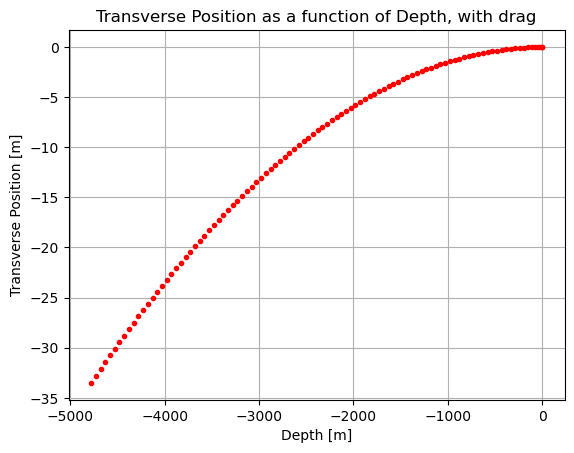

In [8]:
gamma = 2
alpha = 0.004
def free_fall_drag_coriolis(t,s):
    y = s[0]
    x = s[1]
    vy = s[2]
    vx = s[3]
    
    d = np.zeros(len(s))
    
    d[0] = vy
    d[1] = vx + alpha*((vx)**gamma)
    d[2] = -var_grav(y+R_earth) + alpha*((vy)**gamma) - 2*omega*vx
    d[3] = 2*omega*vy
    
    return d
bottom.terminal = False

def side(t,s):
    return s[1]+5

t1_drag = 100
tt2 = np.linspace(t0,t1_drag, 100)

coriolis_drag_case = solve_ivp(fun = free_fall_drag_coriolis, t_span = (t0,t1_drag), y0 = [0,0,0,0], t_eval = tt2, events = [bottom, side])

y = coriolis_drag_case.y[0] 
x = coriolis_drag_case.y[1] 
vy = coriolis_drag_case.y[2]
vx = coriolis_drag_case.y[3]

crash3 = coriolis_drag_case.t_events[0]
side_hit = coriolis_drag_case.t_events[1]
side_hit_time = int(side_hit[0])
side_hit_depth = coriolis_drag_case.y_events[1]

print(f"The mass hits the bottom of the 4km shaft at {crash3[0]} seconds and the side of the shaft at {side_hit[0]} seconds at a depth of {y[side_hit_time]} assuming no drag using solve_ivp")
hit = side_hit[0]<crash3[0]

if hit == True: 
    print("The mass hits the side before it hits the bottom")
else:
    print("The mass does not hit the side")


fig, ax = plt.subplots()
ax.plot(y,x, "ro", label = "Transverse Position in terms of Depth", markersize = 3)
ax.set_xlabel("Depth [m]")
ax.set_ylabel("Transverse Position [m]")
ax.set_title("Transverse Position as a function of Depth, with drag")
plt.savefig("Transverse_Position.png")
ax.grid()

## Infinitely Deep Mine

The mass reaches the centre of the other side at 1266.5029586320188 seconds, at a velocity of -7912.08569723809 m/s
The mass reaches the other side at 2532.266324246315 seconds, and back to the top at 5064.135769350866 seconds


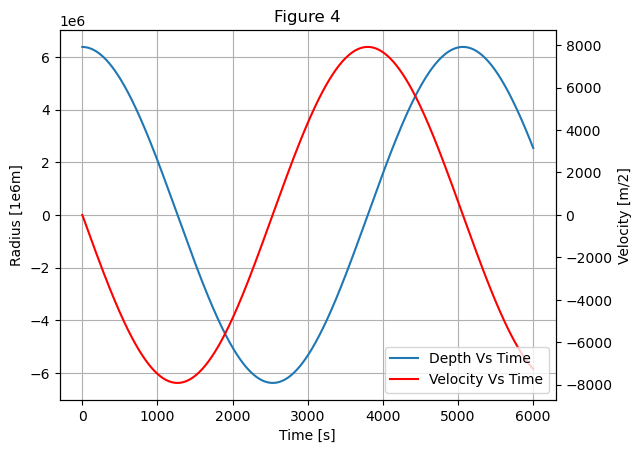

In [9]:
omega = 0
alpha = 0
def free_fall_drag_coriolis(t,s):
    y = s[0]
    x = s[1]
    vy = s[2]
    vx = s[3]
    
    d = np.zeros(len(s))
    
    d[0] = vy
    d[1] = vx + alpha*((vx)**gamma)
    d[2] = -var_grav(y+R_earth) + alpha*((vy)**gamma) - 2*omega*vx
    d[3] = 2*omega*vy
    
    return d

def other_side(t,s):
    return s[2]

def centre(t,s):
    return s[0] +R_earth

t1_inf = 6000
tt3 = np.linspace(t0,t1_inf, 6000)

inf_mine_case = solve_ivp(fun = free_fall_drag_coriolis, t_span = (t0,t1_inf), y0 = [0,0,0,0], t_eval = tt3, events = [other_side, centre])

y = inf_mine_case.y[0] + R_earth
vy = inf_mine_case.y[2]


other_side = inf_mine_case.t_events[0]
centre_earth = inf_mine_case.t_events[1]
t_centre = int(centre_earth[0])-1
print(f"The mass reaches the centre of the other side at {centre_earth[0]} seconds, at a velocity of {vy[t_centre]} m/s")
print(f"The mass reaches the other side at {other_side[1]} seconds, and back to the top at {other_side[2]} seconds")

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(tt3,y, label = "Depth Vs Time")
ax2.plot(tt3,vy, label = "Velocity Vs Time", color = "red")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc = 4)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Radius [1e6m]")
ax2.set_ylabel("Velocity [m/2]")
ax.set_title("Figure 4")
ax.grid()

Since the force of gravity is a function of the distance from the centre, as the mass reaches the centre, the force diminishes towards 0, and then begins to rise, in the opposite direction, as the momentum carries the mass across the centre, and causes the velocity to reach 0 at the opposite surface of the e

In [10]:
V_orbit = np.sqrt((G*M_earth)/R_earth)
T_orbit = (2*np.pi*R_earth)/V_orbit
print(f"An object in orbit has a period of {T_orbit} seconds")

An object in orbit has a period of 5069.371199675785 seconds


The orbital period is around 5069 seconds whereas the corssing time is around 5064 seconds. This value should theoritcally be the same, however, since the crossing time is calculated takenwhen vertical velocity reaches 0 for the second time, a discrepency arises. This is because the mass reaches very very close to the other side, and very very close to the top again but does not quite reach it before the velocity reaches 0.

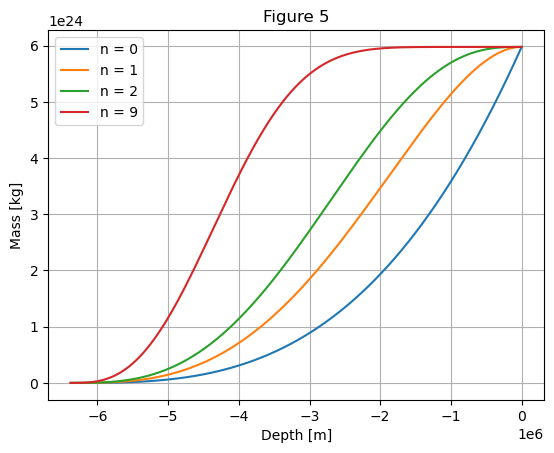

In [11]:
rr = np.linspace(0,R_earth,5000)

def MM(r, r_n, nn):
    roh_n = r_n
    n = nn
    def M_fun(r):
        roh = roh_n*((1 - ((r)/R_earth)**2)**n)
        m = 4*np.pi*roh*(r**2)
        return m
    M = np.zeros(len(r)) # create space to store results
    
    for i in range(len(r)):
        M[i], err = integrate.quad(M_fun, 0, r[i]) 
    return M

F0 = MM(rr, 5499.5, 0)
F1 = MM(rr, 13749, 1) 
F2 = MM(rr, 24060, 2)
F9 = MM(rr, 135660, 9)

fig, ax = plt.subplots()
ax.plot(-(R_earth-rr),F0, label = "n = 0")
ax.plot(-(R_earth-rr),F1, label = "n = 1")
ax.plot(-(R_earth-rr),F2, label = "n = 2")
ax.plot(-(R_earth-rr),F9, label = "n = 9")
ax.set_xlabel("Depth [m]")
ax.set_ylabel("Mass [kg]")
ax.set_title("Figure 5")
ax.legend()
ax.grid()

/var/folders/8_/749tf3fx7cd1kh9nfx_3q1640000gn/T/ipykernel_13192/213959078.py:4: RuntimeWarning: invalid value encountered in scalar divide
  force0[i] = G*F[i]/(r[i]**2)


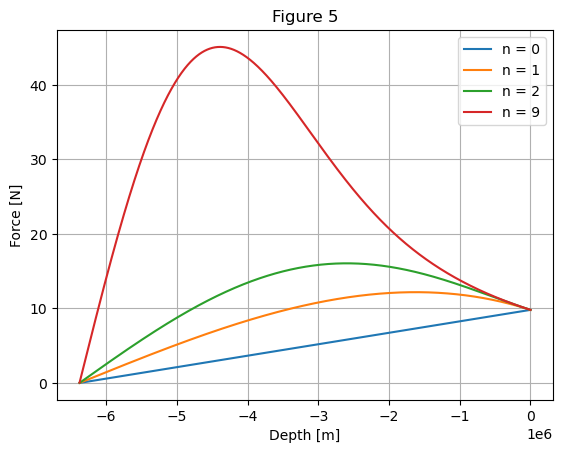

In [12]:
def force(F,r):
    force0 = np.zeros(len(r))
    for i in range(len(r)):
        force0[i] = G*F[i]/(r[i]**2)
    return force0

force0 = force(F0,rr)
force1 = force(F1,rr)
force2 = force(F2,rr)
force9 = force(F9,rr)

fig, ax = plt.subplots()
ax.plot(-(R_earth-rr),force0, label = "n = 0")
ax.plot(-(R_earth-rr),force1, label = "n = 1")
ax.plot(-(R_earth-rr),force2, label = "n = 2")
ax.plot(-(R_earth-rr),force9, label = "n = 9")
ax.set_xlabel("Depth [m]")
ax.set_ylabel("Force [N]")
ax.set_title("Figure 5")
ax.legend()
ax.grid()

The mass reaches the centre of the earth at 1267.0232295053638 seconds at a velocity of -7905.776175637247 m/s for n= 0
The crossing time is  for n = 0 is 2533.0589964862324 seconds
The mass reaches the centre of the earth at 1096.2448083312906 seconds at a velocity of -10464.124784549453 m/s for n= 1
The crossing time is  for n = 1 is 2189.0435173395094 seconds
The mass reaches the centre of the earth at 1034.8984037280331 seconds at a velocity of -12205.090152773471 m/s for n= 2
The crossing time is  for n = 2 is 2071.995609671614 seconds
The mass reaches the centre of the earth at 943.5855671938509 seconds at a velocity of -18399.95341938575 m/s for n= 9
The crossing time is  for n = 9 is 1886.2083238917373 seconds


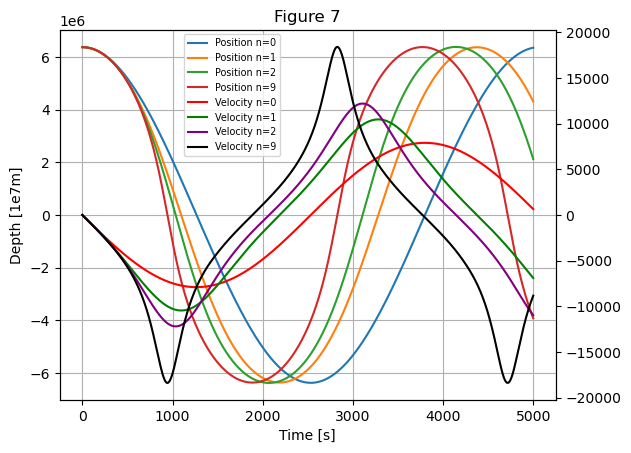

In [13]:
alpha = 0.004
gamma = 0

t1_n = 5000
tt4 = np.linspace(t0,t1_n,5000)

def M_fun(r):
    roh = roh_n*((1 - ((r)/R_earth)**2)**n)
    m = 4*np.pi*roh*(r**2)
    return m

def free_fall_g_density(t,s):
    y = s[0]
    v = s[1]
    
    d = np.zeros(len(s))
    M, err = integrate.quad(M_fun, 0, y+R_earth) 
    force = G*M/((y+R_earth)**2)
    
    d[0] = v
    d[1] = -force + alpha*((v)**gamma)
    
    return d


def centre(t,s):
    return s[0] + R_earth

def crossing(t,s):
    return s[1]

roh_n = 5499.5
n = 0

n0_case = solve_ivp(fun = free_fall_g_density, t_span = (t0,t1_n), y0 = [0,0], t_eval = tt4, events = [centre,crossing])
y0 = n0_case.y[0]
vy0 = n0_case.y[1]

t_centre1 = n0_case.t_events[0]
crossing1 = n0_case.t_events[1]
t_crossing1 = crossing1[1]
index_centre = int(t_centre1[0])
print(f"The mass reaches the centre of the earth at {t_centre1[0]} seconds at a velocity of {vy0[index_centre]} m/s for n= {n}")
print(f"The crossing time is  for n = {n} is {t_crossing1} seconds")

roh_n = 13749
n = 1

n1_case = solve_ivp(fun = free_fall_g_density, t_span = (t0,t1_n), y0 = [0,0], t_eval = tt4, events = [centre,crossing])
y1 = n1_case.y[0]
vy1 = n1_case.y[1]

t_centre2 = n1_case.t_events[0]
crossing2 = n1_case.t_events[1]
t_crossing2 = crossing2[1]
index_centre = int(t_centre2[0])
print(f"The mass reaches the centre of the earth at {t_centre2[0]} seconds at a velocity of {vy1[index_centre]} m/s for n= {n}")
print(f"The crossing time is  for n = {n} is {t_crossing2} seconds")

roh_n = 24060
n = 2

n2_case = solve_ivp(fun = free_fall_g_density, t_span = (t0,t1_n), y0 = [0,0], t_eval = tt4, events = [centre,crossing])
y2 = n2_case.y[0]
vy2 = n2_case.y[1]

t_centre3 = n2_case.t_events[0]
crossing3 = n2_case.t_events[1]
t_crossing3 = crossing3[1]
index_centre = int(t_centre3[0])
print(f"The mass reaches the centre of the earth at {t_centre3[0]} seconds at a velocity of {vy2[index_centre]} m/s for n= {n}")
print(f"The crossing time is  for n = {n} is {t_crossing3} seconds")

roh_n = 135660
n = 9

n9_case = solve_ivp(fun = free_fall_g_density, t_span = (t0,t1_n), y0 = [0,0], t_eval = tt4, events = [centre,crossing])
y9 = n9_case.y[0]
vy9 = n9_case.y[1]

t_centre9 = n9_case.t_events[0]
crossing9 = n9_case.t_events[1]
t_crossing9 = crossing9[1]
index_centre = int(t_centre9[0])
print(f"The mass reaches the centre of the earth at {t_centre9[0]} seconds at a velocity of {vy9[index_centre]} m/s for n= {n}")
print(f"The crossing time is  for n = {n} is {t_crossing9} seconds")

fig, ax0 = plt.subplots()
ax0_twinx = ax0.twinx()
ax0.plot(tt4,y0+R_earth, label = "Position n=0")
ax0_twinx.plot(tt4,vy0, color = "red", label = "Velocity n=0" )
ax0.plot(tt4,y1+R_earth,label = "Position n=1")
ax0_twinx.plot(tt4,vy1, color = "green", label = "Velocity n=1")
ax0.plot(tt4,y2+R_earth,label = "Position n=2")
ax0_twinx.plot(tt4,vy2, color = "purple", label = "Velocity n=2")
ax0.plot(tt4,y9+R_earth,label = "Position n=9")
ax0_twinx.plot(tt4,vy9, color = "black", label = "Velocity n=9")
lines, labels = ax0.get_legend_handles_labels()
lines2, labels2 = ax0_twinx.get_legend_handles_labels()
ax0_twinx.legend(lines + lines2, labels + labels2, loc = (0.25,0.66), fontsize = "x-small")
ax0.set_xlabel("Time [s]")
ax0.set_ylabel("Depth [1e7m]")
ax0.set_title("Figure 7")
ax0.grid()
#plt.savefig("Varying_Density.png")

In [14]:
g = G*M_moon/(R_moon**2)
def free_fall(t,s):
    y = s[0]
    v = s[1]
    
    d = np.zeros(len(s))
    
    d[0] = v
    d[1] = - g + alpha*((v)**gamma)
    
    return d

def centre(t,s):
    return s[0]+R_moon

Moon_fall_time = solve_ivp(fun = free_fall, t_span = (t0,t1_inf), t_eval = tt3, y0 = [0,0], events = centre)
centre_moon = Moon_fall_time.t_events[0]
print(f"The mass reaches the centre of the moon at {centre_moon[0]} seconds")

The mass reaches the centre of the moon at 1464.927606843126 seconds


In [15]:
Moon_density = M_moon/((4/3)*np.pi*(R_moon**2))
Earth_density = M_earth/((4/3)*np.pi*(R_earth**2))
print(f"Assuming the moon is homogenous, it's density is {Moon_density} kg/m^3, which is {Earth_density/Moon_density} time smaller than the density of the earth")

Assuming the moon is homogenous, it's density is 5808302286.507 kg/m^3, which is 6.033916985738527 time smaller than the density of the earth


The free fall time is inversly proportional to the root of the density

In [16]:
time_ratio_dens = (np.sqrt(Moon_density)*R_earth)/(np.sqrt(Earth_density)*R_moon)
time_ratio_fall = centre_moon[0]/centre_earth[0]
print(time_ratio_dens, time_ratio_fall)

1.4938840799830988 1.1566712867575377


The above calculation shows that the relationship is approximately true. The difference in the two ratios is likely due to the freefall to the centre of the earth being slightly larger due to the consideration of a variable gravity